In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def error_level_analysis(image_path):
    """Perform Error Level Analysis (ELA) on the image."""
    # Check if the image file exists
    if not os.path.isfile(image_path):
        print(f"File not found: {image_path}")
        return
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded correctly
    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    # Convert to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Save the original image as a JPEG with quality 95
    temp_image_path = 'temp_image.jpg'
    cv2.imwrite(temp_image_path, image_rgb, [int(cv2.IMWRITE_JPEG_QUALITY), 95])
    
    # Load the compressed image
    compressed_image = cv2.imread(temp_image_path)
    
    # Calculate the absolute difference between the original and compressed image
    ela_image = cv2.absdiff(image_rgb, compressed_image)
    
    # Normalize the ELA image to 0-255
    ela_image = cv2.cvtColor(ela_image, cv2.COLOR_RGB2GRAY)
    ela_image = cv2.normalize(ela_image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Apply a threshold to highlight the differences
    threshold_value = 15  # Adjust this value based on your images
    _, thresholded = cv2.threshold(ela_image, threshold_value, 255, cv2.THRESH_BINARY)

    # Use an alternative colormap for improved visibility
    colored_thresholded = cv2.applyColorMap(thresholded, cv2.COLORMAP_INFERNO)

    # Display the original image and the ELA result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Error Level Analysis (ELA)')
    plt.imshow(colored_thresholded)
    plt.axis('off')
    
    plt.show()


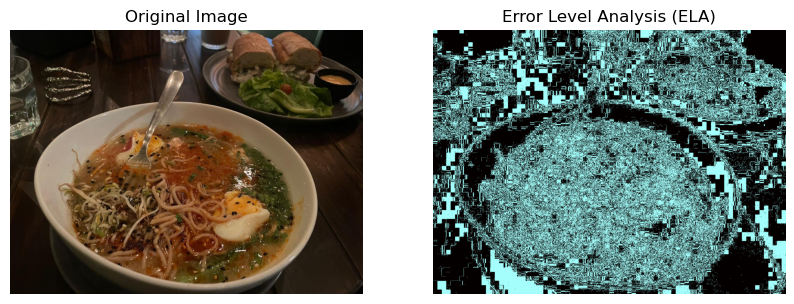

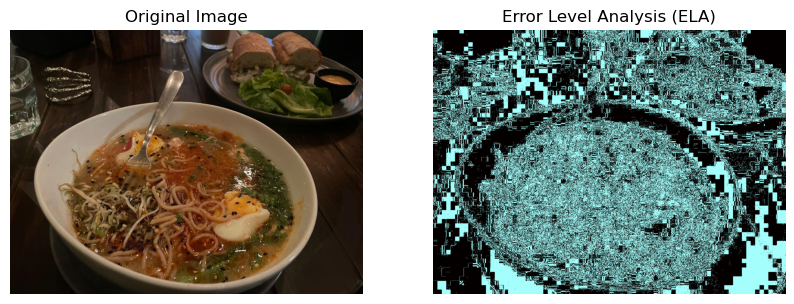

In [49]:
# Test with Original Image
image_path = r'C:\Users\joela\Desktop\PracticalsPractice\csdf\original.jpeg'
error_level_analysis(image_path)

# Test with Edited Image
image_path = r"altered.jpeg"
error_level_analysis(image_path)


In [31]:
from PIL import Image, ImageChops, ImageEnhance

def ela_analysis(image_path, output_path, quality=90):
    try:
        original_image = Image.open(image_path)
        original_image.save("temp.jpg", "JPEG", quality=quality)
        temp_image = Image.open("temp.jpg")

        # Adjusting brightness and contrast of the original image for clarity
        original_image = ImageEnhance.Brightness(original_image).enhance(1.5)  # Adjust brightness
        original_image = ImageEnhance.Contrast(original_image).enhance(1.5)  # Adjust contrast

        ela_image = ImageChops.difference(temp_image, original_image)
        extrema = ela_image.getextrema()
        max_diff = max([ex[1] for ex in extrema])
        scale = 255.0 / max_diff

        ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
        ela_image.save(output_path)
        return ela_image
    except Exception as e:
        print("Error performing ELA analysis:", str(e))
        return None


def forgery_detection(image_path, output_path, block_size=16, threshold=30):
    ela_image = ela_analysis(image_path, output_path)

    if ela_image is not None:
        width, height = ela_image.size
        for x in range(0, width, block_size):
            for y in range(0, height, block_size):
                block = ela_image.crop((x, y, x + block_size, y + block_size))
                extrema = block.getextrema()
                max_diff = max([ex[1] for ex in extrema])
                if max_diff > threshold:
                    print(f"Potential forgery detected in block at ({x}, {y})")


In [23]:
image_path = r'altered.jpeg'
output_ela_path = r'C:\Users\joela\Desktop\PracticalsPractice\csdf\temp\temp2.jpeg'
forgery_detection(image_path, output_ela_path)

Potential forgery detected in block at (0, 0)
Potential forgery detected in block at (0, 16)
Potential forgery detected in block at (0, 32)
Potential forgery detected in block at (0, 48)
Potential forgery detected in block at (0, 64)
Potential forgery detected in block at (0, 80)
Potential forgery detected in block at (0, 96)
Potential forgery detected in block at (0, 112)
Potential forgery detected in block at (0, 128)
Potential forgery detected in block at (0, 144)
Potential forgery detected in block at (0, 160)
Potential forgery detected in block at (0, 176)
Potential forgery detected in block at (0, 192)
Potential forgery detected in block at (0, 208)
Potential forgery detected in block at (0, 224)
Potential forgery detected in block at (0, 240)
Potential forgery detected in block at (0, 256)
Potential forgery detected in block at (0, 272)
Potential forgery detected in block at (0, 288)
Potential forgery detected in block at (0, 304)
Potential forgery detected in block at (0, 320)
